In [1]:
import tensorflow
from  tensorflow import keras
print('TensorFlow version:',tensorflow.__version__)
print('Keras version:',keras.__version__)

TensorFlow version: 2.18.0
Keras version: 3.8.0


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


In [4]:
data = '../../data/shapes'

classes = os.listdir(data)

In [8]:
classes.sort()
print(classes)
print(len(classes), "classes:")

['circle', 'square', 'triangle']
3 classes:


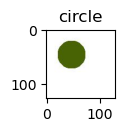

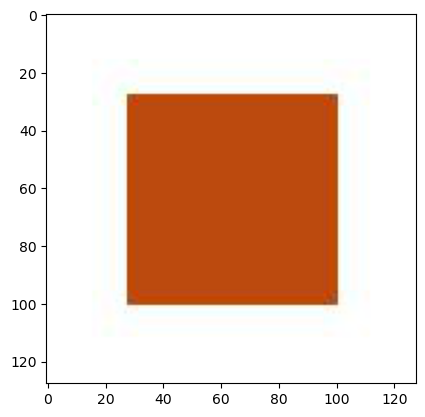

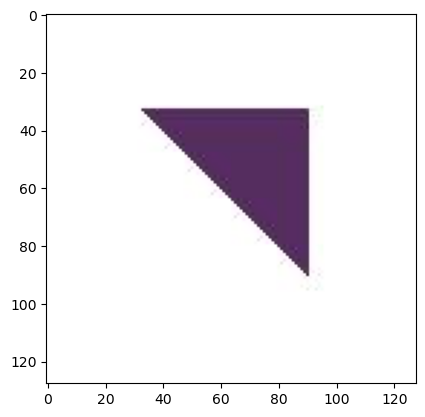

In [15]:
fig = plt.figure(figsize=(3, 12))
i = 0

for sub_dir in os.listdir(data):
    i += 1
    img = mpimg.imread(os.path.join(data, sub_dir, os.listdir(os.path.join(data, sub_dir))[0]))
    a = fig.add_subplot(10, 3, i)
    imgplot = plt.imshow(img)
    a.set_title(sub_dir)
    plt.show()


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
img_size = (128, 128)
batch_size = 30

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 840 images belonging to 3 classes.
Preparing validation dataset...
Found 360 images belonging to 3 classes.
Data generators ready


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

d:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [24]:
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
model.add(Dropout(0.2))

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 123, 123, 32)   │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 23, 23, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        11,619 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,899 (347.26 KB)

 Trainable params: 88,899 (347.26 KB)

 Non-trainable params: 0 (0.00 B)

None


In [29]:
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

d:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 635ms/step - accuracy: 0.4315 - loss: 1.0440 - val_accuracy: 0.7972 - val_loss: 0.3996
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.8098 - loss: 0.3849 - val_accuracy: 0.9222 - val_loss: 0.2075
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9533 - loss: 0.1444 - val_accuracy: 0.9806 - val_loss: 0.0511
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9800 - loss: 0.0597 - val_accuracy: 0.9944 - val_loss: 0.0134
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9956 - loss: 0.0180 - val_accuracy: 0.9972 - val_loss: 0.0052


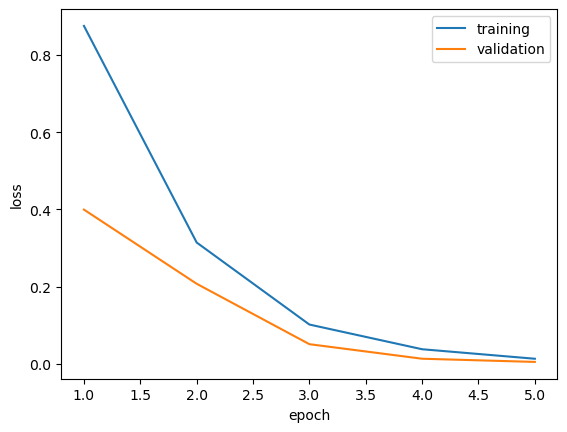

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

Generating predictions from validation data...


In [34]:
class_probabilities = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [35]:
predictions = np.argmax(class_probabilities, axis=1)

In [36]:
true_labels = np.argmax(y_test, axis=1)

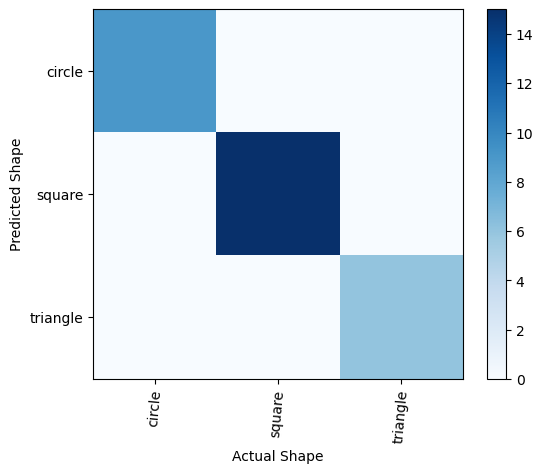

In [37]:
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Actual Shape")
plt.ylabel("Predicted Shape")
plt.show()

In [38]:
# Save the trained model
modelFileName = 'models/shape_classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/shape_classifier.h5
